In [58]:
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report


In [59]:
df = pd.read_csv("heart_attack_prediction_dataset(in).csv")  # fix spelling and file location
df

,Patient ID,Age,Sex,Cholesterol,Blood Pressure,Heart Rate,Diabetes,Family History,Smoking,Obesity,...,Sedentary Hours Per Day,Income,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Country,Continent,Hemisphere,Heart Attack Risk
0,BMW7812,67,Male,208,158/88,72,0,0,1,0,...,6.615001,261404,31.251233,286,0,6,Argentina,South America,Southern Hemisphere,0
1,CZE1114,21,Male,389,165/93,98,1,1,1,1,...,4.963459,285768,27.194973,235,1,7,Canada,North America,Northern Hemisphere,0
2,BNI9906,21,Female,324,174/99,72,1,0,0,0,...,9.463426,235282,28.176571,587,4,4,France,Europe,Northern Hemisphere,0
3,JLN3497,84,Male,383,163/100,73,1,1,1,0,...,7.648981,125640,36.464704,378,3,4,Canada,North America,Northern Hemisphere,0
4,GFO8847,66,Male,318,91/88,93,1,1,1,1,...,1.514821,160555,21.809144,231,1,5,Thailand,Asia,Northern Hemisphere,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8758,MSV9918,60,Male,121,94/76,61,1,1,1,0,...,10.806373,235420,19.655895,67,7,7,Thailand,Asia,Northern Hemisphere,0
8759,QSV6764,28,Female,120,157/102,73,1,0,0,1,...,3.833038,217881,23.993866,617,4,9,Canada,North America,Northern Hemisphere,0
8760,XKA5925,47,Male,250,161/75,105,0,1,1,1,...,2.375214,36998,35.406146,527,4,4,Brazil,South America,Southern Hemisphere,1
8761,EPE6801,36,Male,178,119/67,60,1,0,1,0,...,0.029104,209943,27.294020,114,2,8,Brazil,South America,Southern Hemisphere,0


In [60]:
df.head()

,Patient ID,Age,Sex,Cholesterol,Blood Pressure,Heart Rate,Diabetes,Family History,Smoking,Obesity,...,Sedentary Hours Per Day,Income,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Country,Continent,Hemisphere,Heart Attack Risk
0,BMW7812,67,Male,208,158/88,72,0,0,1,0,...,6.615001,261404,31.251233,286,0,6,Argentina,South America,Southern Hemisphere,0
1,CZE1114,21,Male,389,165/93,98,1,1,1,1,...,4.963459,285768,27.194973,235,1,7,Canada,North America,Northern Hemisphere,0
2,BNI9906,21,Female,324,174/99,72,1,0,0,0,...,9.463426,235282,28.176571,587,4,4,France,Europe,Northern Hemisphere,0
3,JLN3497,84,Male,383,163/100,73,1,1,1,0,...,7.648981,125640,36.464704,378,3,4,Canada,North America,Northern Hemisphere,0
4,GFO8847,66,Male,318,91/88,93,1,1,1,1,...,1.514821,160555,21.809144,231,1,5,Thailand,Asia,Northern Hemisphere,0


In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8763 entries, 0 to 8762
Data columns (total 26 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Patient ID                       8763 non-null   object 
 1   Age                              8763 non-null   int64  
 2   Sex                              8763 non-null   object 
 3   Cholesterol                      8763 non-null   int64  
 4   Blood Pressure                   8763 non-null   object 
 5   Heart Rate                       8763 non-null   int64  
 6   Diabetes                         8763 non-null   int64  
 7   Family History                   8763 non-null   int64  
 8   Smoking                          8763 non-null   int64  
 9   Obesity                          8763 non-null   int64  
 10  Alcohol Consumption              8763 non-null   int64  
 11  Exercise Hours Per Week          8763 non-null   float64
 12  Diet                

In [62]:
# Show all columns
print(df.columns)

# Check for duplicates
print("Duplicate rows:", df.duplicated().sum())

Index(['Patient ID', 'Age', 'Sex', 'Cholesterol', 'Blood Pressure',
       'Heart Rate', 'Diabetes', 'Family History', 'Smoking', 'Obesity',
       'Alcohol Consumption', 'Exercise Hours Per Week', 'Diet',
       'Previous Heart Problems', 'Medication Use', 'Stress Level',
       'Sedentary Hours Per Day', 'Income', 'BMI', 'Triglycerides',
       'Physical Activity Days Per Week', 'Sleep Hours Per Day', 'Country',
       'Continent', 'Hemisphere', 'Heart Attack Risk'],
      dtype='object')
Duplicate rows: 0


In [63]:
# Remove spaces and standardize column names
df.columns = df.columns.str.strip().str.replace(" ", "_")

# Check result
print(df.columns.tolist())


['Patient_ID', 'Age', 'Sex', 'Cholesterol', 'Blood_Pressure', 'Heart_Rate', 'Diabetes', 'Family_History', 'Smoking', 'Obesity', 'Alcohol_Consumption', 'Exercise_Hours_Per_Week', 'Diet', 'Previous_Heart_Problems', 'Medication_Use', 'Stress_Level', 'Sedentary_Hours_Per_Day', 'Income', 'BMI', 'Triglycerides', 'Physical_Activity_Days_Per_Week', 'Sleep_Hours_Per_Day', 'Country', 'Continent', 'Hemisphere', 'Heart_Attack_Risk']


In [64]:
columns_to_drop = ["Patient_ID","Income","Country","Alcohol_Consumption","Continent","Hemisphere"]  # adjust based on your dataset
df = df.drop(columns=columns_to_drop, errors='ignore')  # ignore if column not present

# Check resu
df.head()


,Age,Sex,Cholesterol,Blood_Pressure,Heart_Rate,Diabetes,Family_History,Smoking,Obesity,Exercise_Hours_Per_Week,Diet,Previous_Heart_Problems,Medication_Use,Stress_Level,Sedentary_Hours_Per_Day,BMI,Triglycerides,Physical_Activity_Days_Per_Week,Sleep_Hours_Per_Day,Heart_Attack_Risk
0,67,Male,208,158/88,72,0,0,1,0,4.168189,Average,0,0,9,6.615001,31.251233,286,0,6,0
1,21,Male,389,165/93,98,1,1,1,1,1.813242,Unhealthy,1,0,1,4.963459,27.194973,235,1,7,0
2,21,Female,324,174/99,72,1,0,0,0,2.078353,Healthy,1,1,9,9.463426,28.176571,587,4,4,0
3,84,Male,383,163/100,73,1,1,1,0,9.828130,Average,1,0,9,7.648981,36.464704,378,3,4,0
4,66,Male,318,91/88,93,1,1,1,1,5.804299,Unhealthy,1,0,6,1.514821,21.809144,231,1,5,0


In [65]:
print(df['Sex'].unique())

['Male' 'Female']


In [66]:
df['Sex'] = df['Sex'].map({'Male':1, 'Female':0}) #male 1, female 0
df

,Age,Sex,Cholesterol,Blood_Pressure,Heart_Rate,Diabetes,Family_History,Smoking,Obesity,Exercise_Hours_Per_Week,Diet,Previous_Heart_Problems,Medication_Use,Stress_Level,Sedentary_Hours_Per_Day,BMI,Triglycerides,Physical_Activity_Days_Per_Week,Sleep_Hours_Per_Day,Heart_Attack_Risk
0,67,1,208,158/88,72,0,0,1,0,4.168189,Average,0,0,9,6.615001,31.251233,286,0,6,0
1,21,1,389,165/93,98,1,1,1,1,1.813242,Unhealthy,1,0,1,4.963459,27.194973,235,1,7,0
2,21,0,324,174/99,72,1,0,0,0,2.078353,Healthy,1,1,9,9.463426,28.176571,587,4,4,0
3,84,1,383,163/100,73,1,1,1,0,9.828130,Average,1,0,9,7.648981,36.464704,378,3,4,0
4,66,1,318,91/88,93,1,1,1,1,5.804299,Unhealthy,1,0,6,1.514821,21.809144,231,1,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8758,60,1,121,94/76,61,1,1,1,0,7.917342,Healthy,1,1,8,10.806373,19.655895,67,7,7,0
8759,28,0,120,157/102,73,1,0,0,1,16.558426,Healthy,0,0,8,3.833038,23.993866,617,4,9,0
8760,47,1,250,161/75,105,0,1,1,1,3.148438,Average,1,0,5,2.375214,35.406146,527,4,4,1
8761,36,1,178,119/67,60,1,0,1,0,3.789950,Unhealthy,1,1,5,0.029104,27.294020,114,2,8,0


In [67]:
df['Cholesterol'].describe()

count    8763.000000
mean      259.877211
std        80.863276
min       120.000000
25%       192.000000
50%       259.000000
75%       330.000000
max       400.000000
Name: Cholesterol, dtype: float64

In [68]:
# Split 'Blood_Pressure' column into two numeric columns
df[['BP_Systolic', 'BP_Diastolic']] = df['Blood_Pressure'].str.split('/', expand=True)
df['BP_Systolic'] = pd.to_numeric(df['BP_Systolic'], errors='coerce')
df['BP_Diastolic'] = pd.to_numeric(df['BP_Diastolic'], errors='coerce')

# Drop original column
df = df.drop('Blood_Pressure', axis=1)

# Check
print(df[['BP_Systolic','BP_Diastolic']].head())


   BP_Systolic  BP_Diastolic
0          158            88
1          165            93
2          174            99
3          163           100
4           91            88


In [69]:
Q1 = df['Heart_Rate'].quantile(0.25)
Q3 = df['Heart_Rate'].quantile(0.75)
IQR = Q3 - Q1

outliers = df[(df['Heart_Rate'] < Q1 - 1.5*IQR) | (df['Heart_Rate'] > Q3 + 1.5*IQR)]
print("عدد القيم الشاذة في :", outliers.shape[0])

عدد القيم الشاذة في : 0


In [70]:
df.head()

,Age,Sex,Cholesterol,Heart_Rate,Diabetes,Family_History,Smoking,Obesity,Exercise_Hours_Per_Week,Diet,...,Medication_Use,Stress_Level,Sedentary_Hours_Per_Day,BMI,Triglycerides,Physical_Activity_Days_Per_Week,Sleep_Hours_Per_Day,Heart_Attack_Risk,BP_Systolic,BP_Diastolic
0,67,1,208,72,0,0,1,0,4.168189,Average,...,0,9,6.615001,31.251233,286,0,6,0,158,88
1,21,1,389,98,1,1,1,1,1.813242,Unhealthy,...,0,1,4.963459,27.194973,235,1,7,0,165,93
2,21,0,324,72,1,0,0,0,2.078353,Healthy,...,1,9,9.463426,28.176571,587,4,4,0,174,99
3,84,1,383,73,1,1,1,0,9.828130,Average,...,0,9,7.648981,36.464704,378,3,4,0,163,100
4,66,1,318,93,1,1,1,1,5.804299,Unhealthy,...,0,6,1.514821,21.809144,231,1,5,0,91,88


In [71]:
df['Diet_Healthy'] = df['Diet'].map({
    'Healthy': 1,
    'Average': 0,
    'Unhealthy': 0
})

df.drop(columns=['Diet'], inplace=True)

print(df[['Diet_Healthy']].head())


   Diet_Healthy
0             0
1             0
2             1
3             0
4             0


In [72]:
df

,Age,Sex,Cholesterol,Heart_Rate,Diabetes,Family_History,Smoking,Obesity,Exercise_Hours_Per_Week,Previous_Heart_Problems,...,Stress_Level,Sedentary_Hours_Per_Day,BMI,Triglycerides,Physical_Activity_Days_Per_Week,Sleep_Hours_Per_Day,Heart_Attack_Risk,BP_Systolic,BP_Diastolic,Diet_Healthy
0,67,1,208,72,0,0,1,0,4.168189,0,...,9,6.615001,31.251233,286,0,6,0,158,88,0
1,21,1,389,98,1,1,1,1,1.813242,1,...,1,4.963459,27.194973,235,1,7,0,165,93,0
2,21,0,324,72,1,0,0,0,2.078353,1,...,9,9.463426,28.176571,587,4,4,0,174,99,1
3,84,1,383,73,1,1,1,0,9.828130,1,...,9,7.648981,36.464704,378,3,4,0,163,100,0
4,66,1,318,93,1,1,1,1,5.804299,1,...,6,1.514821,21.809144,231,1,5,0,91,88,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8758,60,1,121,61,1,1,1,0,7.917342,1,...,8,10.806373,19.655895,67,7,7,0,94,76,1
8759,28,0,120,73,1,0,0,1,16.558426,0,...,8,3.833038,23.993866,617,4,9,0,157,102,1
8760,47,1,250,105,0,1,1,1,3.148438,1,...,5,2.375214,35.406146,527,4,4,1,161,75,0
8761,36,1,178,60,1,0,1,0,3.789950,1,...,5,0.029104,27.294020,114,2,8,0,119,67,0


In [73]:
from sklearn.preprocessing import StandardScaler

numeric_cols = [
    'Age','Cholesterol','Heart_Rate','Exercise_Hours_Per_Week',
    'Sedentary_Hours_Per_Day','BMI','Triglycerides',
    'Physical_Activity_Days_Per_Week','Sleep_Hours_Per_Day',
    'BP_Systolic','BP_Diastolic'
]

scaler = StandardScaler()
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])


In [74]:
df

,Age,Sex,Cholesterol,Heart_Rate,Diabetes,Family_History,Smoking,Obesity,Exercise_Hours_Per_Week,Previous_Heart_Problems,...,Stress_Level,Sedentary_Hours_Per_Day,BMI,Triglycerides,Physical_Activity_Days_Per_Week,Sleep_Hours_Per_Day,Heart_Attack_Risk,BP_Systolic,BP_Diastolic,Diet_Healthy
0,0.625557,1,-0.641579,-0.147042,0,0,1,0,-1.010838,0,...,9,0.179251,0.373454,-0.588539,-1.528843,-0.514750,0,0.870044,0.193782,0
1,-1.539322,1,1.596895,1.118179,1,1,1,1,-1.418027,1,...,1,-0.297225,-0.268479,-0.816487,-1.090738,-0.011823,0,1.135714,0.534480,0
2,-1.539322,0,0.793023,-0.147042,1,0,0,0,-1.372188,1,...,9,1.001031,-0.113134,0.756800,0.223577,-1.520604,0,1.477290,0.943319,1
3,1.425621,1,1.522691,-0.098380,1,1,1,0,-0.032188,1,...,9,0.477557,1.198524,-0.177339,-0.214528,-1.520604,0,1.059809,1.011458,0
4,0.578495,1,0.718820,0.874867,1,1,1,1,-0.727941,1,...,6,-1.292170,-1.120826,-0.834365,-1.090738,-1.017677,0,-1.672797,0.193782,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8758,0.296119,1,-1.717530,-0.682328,1,1,1,0,-0.362578,1,...,8,1.388476,-1.461594,-1.567374,1.537893,-0.011823,0,-1.558939,-0.623895,1
8759,-1.209884,0,-1.729898,-0.098380,1,0,0,1,1.131536,0,...,8,-0.623356,-0.775078,0.890887,0.223577,0.994032,0,0.832092,1.147738,1
8760,-0.315695,1,-0.122154,1.458815,0,1,1,1,-1.187161,1,...,5,-1.043943,1.030999,0.488626,0.223577,-1.520604,1,0.983903,-0.692035,0
8761,-0.833383,1,-1.012597,-0.730990,1,0,1,0,-1.076238,1,...,5,-1.720804,-0.252804,-1.357305,-0.652633,0.491104,0,-0.610117,-1.237152,0


In [75]:
df = df.dropna()
df

,Age,Sex,Cholesterol,Heart_Rate,Diabetes,Family_History,Smoking,Obesity,Exercise_Hours_Per_Week,Previous_Heart_Problems,...,Stress_Level,Sedentary_Hours_Per_Day,BMI,Triglycerides,Physical_Activity_Days_Per_Week,Sleep_Hours_Per_Day,Heart_Attack_Risk,BP_Systolic,BP_Diastolic,Diet_Healthy
0,0.625557,1,-0.641579,-0.147042,0,0,1,0,-1.010838,0,...,9,0.179251,0.373454,-0.588539,-1.528843,-0.514750,0,0.870044,0.193782,0
1,-1.539322,1,1.596895,1.118179,1,1,1,1,-1.418027,1,...,1,-0.297225,-0.268479,-0.816487,-1.090738,-0.011823,0,1.135714,0.534480,0
2,-1.539322,0,0.793023,-0.147042,1,0,0,0,-1.372188,1,...,9,1.001031,-0.113134,0.756800,0.223577,-1.520604,0,1.477290,0.943319,1
3,1.425621,1,1.522691,-0.098380,1,1,1,0,-0.032188,1,...,9,0.477557,1.198524,-0.177339,-0.214528,-1.520604,0,1.059809,1.011458,0
4,0.578495,1,0.718820,0.874867,1,1,1,1,-0.727941,1,...,6,-1.292170,-1.120826,-0.834365,-1.090738,-1.017677,0,-1.672797,0.193782,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8758,0.296119,1,-1.717530,-0.682328,1,1,1,0,-0.362578,1,...,8,1.388476,-1.461594,-1.567374,1.537893,-0.011823,0,-1.558939,-0.623895,1
8759,-1.209884,0,-1.729898,-0.098380,1,0,0,1,1.131536,0,...,8,-0.623356,-0.775078,0.890887,0.223577,0.994032,0,0.832092,1.147738,1
8760,-0.315695,1,-0.122154,1.458815,0,1,1,1,-1.187161,1,...,5,-1.043943,1.030999,0.488626,0.223577,-1.520604,1,0.983903,-0.692035,0
8761,-0.833383,1,-1.012597,-0.730990,1,0,1,0,-1.076238,1,...,5,-1.720804,-0.252804,-1.357305,-0.652633,0.491104,0,-0.610117,-1.237152,0


In [76]:
print(df.info())
print(df.describe())
df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8763 entries, 0 to 8762
Data columns (total 21 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Age                              8763 non-null   float64
 1   Sex                              8763 non-null   int64  
 2   Cholesterol                      8763 non-null   float64
 3   Heart_Rate                       8763 non-null   float64
 4   Diabetes                         8763 non-null   int64  
 5   Family_History                   8763 non-null   int64  
 6   Smoking                          8763 non-null   int64  
 7   Obesity                          8763 non-null   int64  
 8   Exercise_Hours_Per_Week          8763 non-null   float64
 9   Previous_Heart_Problems          8763 non-null   int64  
 10  Medication_Use                   8763 non-null   int64  
 11  Stress_Level                     8763 non-null   int64  
 12  Sedentary_Hours_Per_

,Age,Sex,Cholesterol,Heart_Rate,Diabetes,Family_History,Smoking,Obesity,Exercise_Hours_Per_Week,Previous_Heart_Problems,...,Stress_Level,Sedentary_Hours_Per_Day,BMI,Triglycerides,Physical_Activity_Days_Per_Week,Sleep_Hours_Per_Day,Heart_Attack_Risk,BP_Systolic,BP_Diastolic,Diet_Healthy
0,0.625557,1,-0.641579,-0.147042,0,0,1,0,-1.010838,0,...,9,0.179251,0.373454,-0.588539,-1.528843,-0.514750,0,0.870044,0.193782,0
1,-1.539322,1,1.596895,1.118179,1,1,1,1,-1.418027,1,...,1,-0.297225,-0.268479,-0.816487,-1.090738,-0.011823,0,1.135714,0.534480,0
2,-1.539322,0,0.793023,-0.147042,1,0,0,0,-1.372188,1,...,9,1.001031,-0.113134,0.756800,0.223577,-1.520604,0,1.477290,0.943319,1
3,1.425621,1,1.522691,-0.098380,1,1,1,0,-0.032188,1,...,9,0.477557,1.198524,-0.177339,-0.214528,-1.520604,0,1.059809,1.011458,0
4,0.578495,1,0.718820,0.874867,1,1,1,1,-0.727941,1,...,6,-1.292170,-1.120826,-0.834365,-1.090738,-1.017677,0,-1.672797,0.193782,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8758,0.296119,1,-1.717530,-0.682328,1,1,1,0,-0.362578,1,...,8,1.388476,-1.461594,-1.567374,1.537893,-0.011823,0,-1.558939,-0.623895,1
8759,-1.209884,0,-1.729898,-0.098380,1,0,0,1,1.131536,0,...,8,-0.623356,-0.775078,0.890887,0.223577,0.994032,0,0.832092,1.147738,1
8760,-0.315695,1,-0.122154,1.458815,0,1,1,1,-1.187161,1,...,5,-1.043943,1.030999,0.488626,0.223577,-1.520604,1,0.983903,-0.692035,0
8761,-0.833383,1,-1.012597,-0.730990,1,0,1,0,-1.076238,1,...,5,-1.720804,-0.252804,-1.357305,-0.652633,0.491104,0,-0.610117,-1.237152,0


In [77]:
df.head()


,Age,Sex,Cholesterol,Heart_Rate,Diabetes,Family_History,Smoking,Obesity,Exercise_Hours_Per_Week,Previous_Heart_Problems,...,Stress_Level,Sedentary_Hours_Per_Day,BMI,Triglycerides,Physical_Activity_Days_Per_Week,Sleep_Hours_Per_Day,Heart_Attack_Risk,BP_Systolic,BP_Diastolic,Diet_Healthy
0,0.625557,1,-0.641579,-0.147042,0,0,1,0,-1.010838,0,...,9,0.179251,0.373454,-0.588539,-1.528843,-0.514750,0,0.870044,0.193782,0
1,-1.539322,1,1.596895,1.118179,1,1,1,1,-1.418027,1,...,1,-0.297225,-0.268479,-0.816487,-1.090738,-0.011823,0,1.135714,0.534480,0
2,-1.539322,0,0.793023,-0.147042,1,0,0,0,-1.372188,1,...,9,1.001031,-0.113134,0.756800,0.223577,-1.520604,0,1.477290,0.943319,1
3,1.425621,1,1.522691,-0.098380,1,1,1,0,-0.032188,1,...,9,0.477557,1.198524,-0.177339,-0.214528,-1.520604,0,1.059809,1.011458,0
4,0.578495,1,0.718820,0.874867,1,1,1,1,-0.727941,1,...,6,-1.292170,-1.120826,-0.834365,-1.090738,-1.017677,0,-1.672797,0.193782,0


In [78]:
print(df.isnull().sum())


Age                                0
Sex                                0
Cholesterol                        0
Heart_Rate                         0
Diabetes                           0
Family_History                     0
Smoking                            0
Obesity                            0
Exercise_Hours_Per_Week            0
Previous_Heart_Problems            0
Medication_Use                     0
Stress_Level                       0
Sedentary_Hours_Per_Day            0
BMI                                0
Triglycerides                      0
Physical_Activity_Days_Per_Week    0
Sleep_Hours_Per_Day                0
Heart_Attack_Risk                  0
BP_Systolic                        0
BP_Diastolic                       0
Diet_Healthy                       0
dtype: int64


In [79]:
print(df.duplicated().sum())
df = df.drop_duplicates()


0


In [80]:
print(df['Heart_Attack_Risk'].value_counts())


Heart_Attack_Risk
0    5624
1    3139
Name: count, dtype: int64


In [81]:
df

,Age,Sex,Cholesterol,Heart_Rate,Diabetes,Family_History,Smoking,Obesity,Exercise_Hours_Per_Week,Previous_Heart_Problems,...,Stress_Level,Sedentary_Hours_Per_Day,BMI,Triglycerides,Physical_Activity_Days_Per_Week,Sleep_Hours_Per_Day,Heart_Attack_Risk,BP_Systolic,BP_Diastolic,Diet_Healthy
0,0.625557,1,-0.641579,-0.147042,0,0,1,0,-1.010838,0,...,9,0.179251,0.373454,-0.588539,-1.528843,-0.514750,0,0.870044,0.193782,0
1,-1.539322,1,1.596895,1.118179,1,1,1,1,-1.418027,1,...,1,-0.297225,-0.268479,-0.816487,-1.090738,-0.011823,0,1.135714,0.534480,0
2,-1.539322,0,0.793023,-0.147042,1,0,0,0,-1.372188,1,...,9,1.001031,-0.113134,0.756800,0.223577,-1.520604,0,1.477290,0.943319,1
3,1.425621,1,1.522691,-0.098380,1,1,1,0,-0.032188,1,...,9,0.477557,1.198524,-0.177339,-0.214528,-1.520604,0,1.059809,1.011458,0
4,0.578495,1,0.718820,0.874867,1,1,1,1,-0.727941,1,...,6,-1.292170,-1.120826,-0.834365,-1.090738,-1.017677,0,-1.672797,0.193782,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8758,0.296119,1,-1.717530,-0.682328,1,1,1,0,-0.362578,1,...,8,1.388476,-1.461594,-1.567374,1.537893,-0.011823,0,-1.558939,-0.623895,1
8759,-1.209884,0,-1.729898,-0.098380,1,0,0,1,1.131536,0,...,8,-0.623356,-0.775078,0.890887,0.223577,0.994032,0,0.832092,1.147738,1
8760,-0.315695,1,-0.122154,1.458815,0,1,1,1,-1.187161,1,...,5,-1.043943,1.030999,0.488626,0.223577,-1.520604,1,0.983903,-0.692035,0
8761,-0.833383,1,-1.012597,-0.730990,1,0,1,0,-1.076238,1,...,5,-1.720804,-0.252804,-1.357305,-0.652633,0.491104,0,-0.610117,-1.237152,0


In [82]:
binary_cols = [
    'Sex','Diabetes','Family_History','Smoking','Obesity',
    'Previous_Heart_Problems','Diet_Healthy','Heart_Attack_Risk'
]

df[binary_cols] = df[binary_cols].astype(int)


In [83]:
df[binary_cols] 

,Sex,Diabetes,Family_History,Smoking,Obesity,Previous_Heart_Problems,Diet_Healthy,Heart_Attack_Risk
0,1,0,0,1,0,0,0,0
1,1,1,1,1,1,1,0,0
2,0,1,0,0,0,1,1,0
3,1,1,1,1,0,1,0,0
4,1,1,1,1,1,1,0,0
...,...,...,...,...,...,...,...,...
8758,1,1,1,1,0,1,1,0
8759,0,1,0,0,1,0,1,0
8760,1,0,1,1,1,1,0,1
8761,1,1,0,1,0,1,0,0


In [84]:
df.isnull().sum()


Age                                0
Sex                                0
Cholesterol                        0
Heart_Rate                         0
Diabetes                           0
Family_History                     0
Smoking                            0
Obesity                            0
Exercise_Hours_Per_Week            0
Previous_Heart_Problems            0
Medication_Use                     0
Stress_Level                       0
Sedentary_Hours_Per_Day            0
BMI                                0
Triglycerides                      0
Physical_Activity_Days_Per_Week    0
Sleep_Hours_Per_Day                0
Heart_Attack_Risk                  0
BP_Systolic                        0
BP_Diastolic                       0
Diet_Healthy                       0
dtype: int64

In [89]:
continuous_cols = [
    'Age',
    'Cholesterol',
    'Heart_Rate',
    'Exercise_Hours_Per_Week',
    'Stress_Level',
    'Sedentary_Hours_Per_Day',
    'BMI',
    'Triglycerides',
    'Physical_Activity_Days_Per_Week',
    'Sleep_Hours_Per_Day',
    'BP_Systolic',
    'BP_Diastolic'
]


for col in continuous_cols:
    lower = df[col].quantile(0.01)
    upper = df[col].quantile(0.99)
    df[col] = df[col].clip(lower, upper)



In [90]:
df

,Age,Sex,Cholesterol,Heart_Rate,Diabetes,Family_History,Smoking,Obesity,Exercise_Hours_Per_Week,Previous_Heart_Problems,...,Stress_Level,Sedentary_Hours_Per_Day,BMI,Triglycerides,Physical_Activity_Days_Per_Week,Sleep_Hours_Per_Day,Heart_Attack_Risk,BP_Systolic,BP_Diastolic,Diet_Healthy
0,0.625557,1,-0.641579,-0.147042,0,0,1,0,-1.010838,0,...,9,0.179251,0.373454,-0.588539,-1.528843,-0.514750,0,0.870044,0.193782,0
1,-1.539322,1,1.596895,1.118179,1,1,1,1,-1.418027,1,...,1,-0.297225,-0.268479,-0.816487,-1.090738,-0.011823,0,1.135714,0.534480,0
2,-1.539322,0,0.793023,-0.147042,1,0,0,0,-1.372188,1,...,9,1.001031,-0.113134,0.756800,0.223577,-1.520604,0,1.477290,0.943319,1
3,1.425621,1,1.522691,-0.098380,1,1,1,0,-0.032188,1,...,9,0.477557,1.198524,-0.177339,-0.214528,-1.520604,0,1.059809,1.011458,0
4,0.578495,1,0.718820,0.874867,1,1,1,1,-0.727941,1,...,6,-1.292170,-1.120826,-0.834365,-1.090738,-1.017677,0,-1.672797,0.193782,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8758,0.296119,1,-1.705163,-0.682328,1,1,1,0,-0.362578,1,...,8,1.388476,-1.461594,-1.567374,1.537893,-0.011823,0,-1.558939,-0.623895,1
8759,-1.209884,0,-1.705163,-0.098380,1,0,0,1,1.131536,0,...,8,-0.623356,-0.775078,0.890887,0.223577,0.994032,0,0.832092,1.147738,1
8760,-0.315695,1,-0.122154,1.458815,0,1,1,1,-1.187161,1,...,5,-1.043943,1.030999,0.488626,0.223577,-1.520604,1,0.983903,-0.692035,0
8761,-0.833383,1,-1.012597,-0.730990,1,0,1,0,-1.076238,1,...,5,-1.691101,-0.252804,-1.357305,-0.652633,0.491104,0,-0.610117,-1.237152,0


In [92]:
# Set random seed for reproducibility
RANDOM_STATE = 42

# Sample from each class
df_0 = df[df['Heart_Attack_Risk'] == 0].sample(n=2500, random_state=RANDOM_STATE)
df_1 = df[df['Heart_Attack_Risk'] == 1].sample(n=2200, random_state=RANDOM_STATE)

# Combine and shuffle
df_balanced = (
    pd.concat([df_0, df_1])
      .sample(frac=1, random_state=RANDOM_STATE)
      .reset_index(drop=True)
)

# Check result
print(df_balanced['Heart_Attack_Risk'].value_counts())
print(len(df_balanced))


Heart_Attack_Risk
0    2500
1    2200
Name: count, dtype: int64
4700


In [94]:
df_balanced['Heart_Attack_Risk'].value_counts()


Heart_Attack_Risk
0    2500
1    2200
Name: count, dtype: int64

In [95]:
df_balanced

,Age,Sex,Cholesterol,Heart_Rate,Diabetes,Family_History,Smoking,Obesity,Exercise_Hours_Per_Week,Previous_Heart_Problems,...,Stress_Level,Sedentary_Hours_Per_Day,BMI,Triglycerides,Physical_Activity_Days_Per_Week,Sleep_Hours_Per_Day,Heart_Attack_Risk,BP_Systolic,BP_Diastolic,Diet_Healthy
0,0.154931,1,-0.827088,0.631555,1,1,1,0,1.153331,1,...,3,1.621629,0.323936,-1.312609,-0.214528,1.496959,1,-0.913740,-1.032733,0
1,-1.492260,1,1.460855,0.388244,1,0,1,1,-0.839226,0,...,8,-1.651018,-0.510778,1.239513,1.099787,-0.514750,0,1.439337,0.261922,0
2,-0.080382,1,0.446740,-0.195704,1,1,1,1,-1.183838,1,...,2,1.694761,-1.493069,1.279739,1.099787,-0.011823,0,-1.293269,1.352157,0
3,0.578495,0,1.300081,-0.439016,0,1,1,0,-1.188202,1,...,6,-0.440841,0.581873,1.413826,-1.528843,-0.011823,0,0.073034,-1.373432,0
4,1.190308,1,-0.171623,-0.876977,1,1,1,0,1.469088,0,...,2,1.521854,-0.686013,0.881948,-0.214528,0.491104,0,-1.065552,1.556576,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4695,-1.021634,1,-0.740517,-0.049717,1,0,1,1,-1.196968,1,...,7,-1.688180,0.553065,0.305374,-1.090738,-1.017677,1,1.211620,1.692856,0
4696,0.578495,1,0.570412,0.923529,1,0,1,0,1.254404,0,...,4,-0.411085,0.917905,0.466278,-0.214528,-0.011823,0,0.945950,-1.714130,0
4697,1.519746,0,-1.210473,1.702127,0,0,1,0,-1.663250,0,...,8,-0.451168,0.472930,0.189165,-0.652633,-1.017677,1,1.211620,0.261922,0
4698,-0.739258,1,-0.789986,-0.001055,0,0,1,0,1.288392,1,...,2,1.168630,0.493670,1.395948,0.223577,-0.514750,1,1.553196,1.215878,1


In [96]:
import numpy as np
df_balanced['Triglycerides'] = np.log1p(df_balanced['Triglycerides'])


C:\Users\USER PC\AppData\Local\Programs\Python\Python313\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


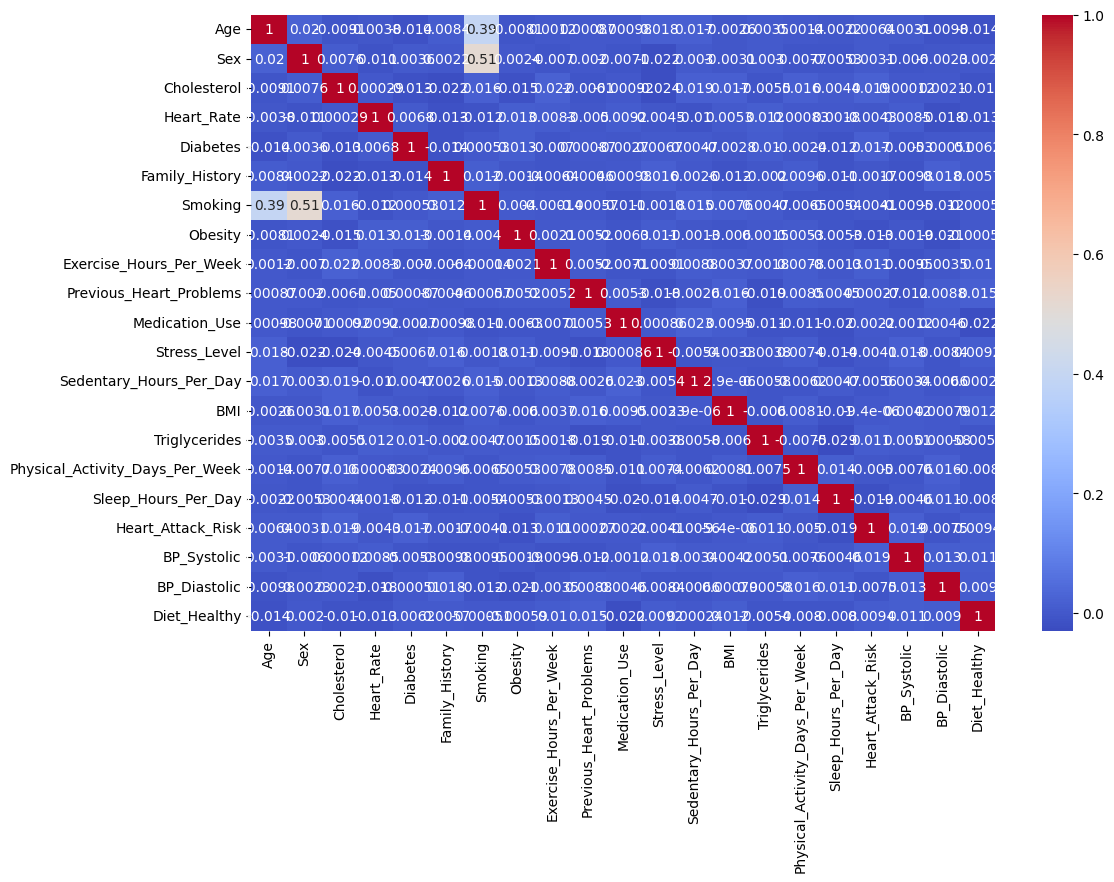

In [97]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.show()


In [99]:
df_balanced['Sedentary_to_Active_Ratio'] = df_balanced['Sedentary_Hours_Per_Day'] / (df_balanced['Physical_Activity_Days_Per_Week'] + 1)


In [100]:
df_balanced

,Age,Sex,Cholesterol,Heart_Rate,Diabetes,Family_History,Smoking,Obesity,Exercise_Hours_Per_Week,Previous_Heart_Problems,...,Sedentary_Hours_Per_Day,BMI,Triglycerides,Physical_Activity_Days_Per_Week,Sleep_Hours_Per_Day,Heart_Attack_Risk,BP_Systolic,BP_Diastolic,Diet_Healthy,Sedentary_to_Active_Ratio
0,0.154931,1,-0.827088,0.631555,1,1,1,0,1.153331,1,...,1.621629,0.323936,NaN,-0.214528,1.496959,1,-0.913740,-1.032733,0,2.064529
1,-1.492260,1,1.460855,0.388244,1,0,1,1,-0.839226,0,...,-1.651018,-0.510778,0.806259,1.099787,-0.514750,0,1.439337,0.261922,0,-0.786279
2,-0.080382,1,0.446740,-0.195704,1,1,1,1,-1.183838,1,...,1.694761,-1.493069,0.824061,1.099787,-0.011823,0,-1.293269,1.352157,0,0.807111
3,0.578495,0,1.300081,-0.439016,0,1,1,0,-1.188202,1,...,-0.440841,0.581873,0.881213,-1.528843,-0.011823,0,0.073034,-1.373432,0,0.833595
4,1.190308,1,-0.171623,-0.876977,1,1,1,0,1.469088,0,...,1.521854,-0.686013,0.632307,-0.214528,0.491104,0,-1.065552,1.556576,0,1.937503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4695,-1.021634,1,-0.740517,-0.049717,1,0,1,1,-1.196968,1,...,-1.688180,0.553065,0.266490,-1.090738,-1.017677,1,1.211620,1.692856,0,18.604929
4696,0.578495,1,0.570412,0.923529,1,0,1,0,1.254404,0,...,-0.411085,0.917905,0.382727,-0.214528,-0.011823,0,0.945950,-1.714130,0,-0.523360
4697,1.519746,0,-1.210473,1.702127,0,0,1,0,-1.663250,0,...,-0.451168,0.472930,0.173252,-0.652633,-1.017677,1,1.211620,0.261922,0,-1.298822
4698,-0.739258,1,-0.789986,-0.001055,0,0,1,0,1.288392,1,...,1.168630,0.493670,0.873779,0.223577,-0.514750,1,1.553196,1.215878,1,0.955093


In [103]:
df_balanced['Age_Group'] = pd.cut(df_balanced['Age'], 
                         bins=[-float('inf'), -1, 0, 1, float('inf')],
                         labels=[0, 1, 2, 3]).astype(int)


In [104]:
df_balanced

,Age,Sex,Cholesterol,Heart_Rate,Diabetes,Family_History,Smoking,Obesity,Exercise_Hours_Per_Week,Previous_Heart_Problems,...,BMI,Triglycerides,Physical_Activity_Days_Per_Week,Sleep_Hours_Per_Day,Heart_Attack_Risk,BP_Systolic,BP_Diastolic,Diet_Healthy,Sedentary_to_Active_Ratio,Age_Group
0,0.154931,1,-0.827088,0.631555,1,1,1,0,1.153331,1,...,0.323936,NaN,-0.214528,1.496959,1,-0.913740,-1.032733,0,2.064529,2
1,-1.492260,1,1.460855,0.388244,1,0,1,1,-0.839226,0,...,-0.510778,0.806259,1.099787,-0.514750,0,1.439337,0.261922,0,-0.786279,0
2,-0.080382,1,0.446740,-0.195704,1,1,1,1,-1.183838,1,...,-1.493069,0.824061,1.099787,-0.011823,0,-1.293269,1.352157,0,0.807111,1
3,0.578495,0,1.300081,-0.439016,0,1,1,0,-1.188202,1,...,0.581873,0.881213,-1.528843,-0.011823,0,0.073034,-1.373432,0,0.833595,2
4,1.190308,1,-0.171623,-0.876977,1,1,1,0,1.469088,0,...,-0.686013,0.632307,-0.214528,0.491104,0,-1.065552,1.556576,0,1.937503,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4695,-1.021634,1,-0.740517,-0.049717,1,0,1,1,-1.196968,1,...,0.553065,0.266490,-1.090738,-1.017677,1,1.211620,1.692856,0,18.604929,0
4696,0.578495,1,0.570412,0.923529,1,0,1,0,1.254404,0,...,0.917905,0.382727,-0.214528,-0.011823,0,0.945950,-1.714130,0,-0.523360,2
4697,1.519746,0,-1.210473,1.702127,0,0,1,0,-1.663250,0,...,0.472930,0.173252,-0.652633,-1.017677,1,1.211620,0.261922,0,-1.298822,3
4698,-0.739258,1,-0.789986,-0.001055,0,0,1,0,1.288392,1,...,0.493670,0.873779,0.223577,-0.514750,1,1.553196,1.215878,1,0.955093,1


In [105]:
df_balanced.drop('Age', axis=1, inplace=True)


In [106]:
df_balanced

,Sex,Cholesterol,Heart_Rate,Diabetes,Family_History,Smoking,Obesity,Exercise_Hours_Per_Week,Previous_Heart_Problems,Medication_Use,...,BMI,Triglycerides,Physical_Activity_Days_Per_Week,Sleep_Hours_Per_Day,Heart_Attack_Risk,BP_Systolic,BP_Diastolic,Diet_Healthy,Sedentary_to_Active_Ratio,Age_Group
0,1,-0.827088,0.631555,1,1,1,0,1.153331,1,1,...,0.323936,NaN,-0.214528,1.496959,1,-0.913740,-1.032733,0,2.064529,2
1,1,1.460855,0.388244,1,0,1,1,-0.839226,0,1,...,-0.510778,0.806259,1.099787,-0.514750,0,1.439337,0.261922,0,-0.786279,0
2,1,0.446740,-0.195704,1,1,1,1,-1.183838,1,0,...,-1.493069,0.824061,1.099787,-0.011823,0,-1.293269,1.352157,0,0.807111,1
3,0,1.300081,-0.439016,0,1,1,0,-1.188202,1,0,...,0.581873,0.881213,-1.528843,-0.011823,0,0.073034,-1.373432,0,0.833595,2
4,1,-0.171623,-0.876977,1,1,1,0,1.469088,0,1,...,-0.686013,0.632307,-0.214528,0.491104,0,-1.065552,1.556576,0,1.937503,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4695,1,-0.740517,-0.049717,1,0,1,1,-1.196968,1,0,...,0.553065,0.266490,-1.090738,-1.017677,1,1.211620,1.692856,0,18.604929,0
4696,1,0.570412,0.923529,1,0,1,0,1.254404,0,1,...,0.917905,0.382727,-0.214528,-0.011823,0,0.945950,-1.714130,0,-0.523360,2
4697,0,-1.210473,1.702127,0,0,1,0,-1.663250,0,1,...,0.472930,0.173252,-0.652633,-1.017677,1,1.211620,0.261922,0,-1.298822,3
4698,1,-0.789986,-0.001055,0,0,1,0,1.288392,1,0,...,0.493670,0.873779,0.223577,-0.514750,1,1.553196,1.215878,1,0.955093,1


In [107]:
# مجموع عوامل الخطر: السكري + تاريخ العائلة + مشاكل القلب السابقة
df_balanced['Health_Risk_Score'] = df_balanced['Diabetes'] + df_balanced['Family_History'] + df_balanced['Previous_Heart_Problems']
df_balanced

,Sex,Cholesterol,Heart_Rate,Diabetes,Family_History,Smoking,Obesity,Exercise_Hours_Per_Week,Previous_Heart_Problems,Medication_Use,...,Triglycerides,Physical_Activity_Days_Per_Week,Sleep_Hours_Per_Day,Heart_Attack_Risk,BP_Systolic,BP_Diastolic,Diet_Healthy,Sedentary_to_Active_Ratio,Age_Group,Health_Risk_Score
0,1,-0.827088,0.631555,1,1,1,0,1.153331,1,1,...,NaN,-0.214528,1.496959,1,-0.913740,-1.032733,0,2.064529,2,3
1,1,1.460855,0.388244,1,0,1,1,-0.839226,0,1,...,0.806259,1.099787,-0.514750,0,1.439337,0.261922,0,-0.786279,0,1
2,1,0.446740,-0.195704,1,1,1,1,-1.183838,1,0,...,0.824061,1.099787,-0.011823,0,-1.293269,1.352157,0,0.807111,1,3
3,0,1.300081,-0.439016,0,1,1,0,-1.188202,1,0,...,0.881213,-1.528843,-0.011823,0,0.073034,-1.373432,0,0.833595,2,2
4,1,-0.171623,-0.876977,1,1,1,0,1.469088,0,1,...,0.632307,-0.214528,0.491104,0,-1.065552,1.556576,0,1.937503,3,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4695,1,-0.740517,-0.049717,1,0,1,1,-1.196968,1,0,...,0.266490,-1.090738,-1.017677,1,1.211620,1.692856,0,18.604929,0,2
4696,1,0.570412,0.923529,1,0,1,0,1.254404,0,1,...,0.382727,-0.214528,-0.011823,0,0.945950,-1.714130,0,-0.523360,2,1
4697,0,-1.210473,1.702127,0,0,1,0,-1.663250,0,1,...,0.173252,-0.652633,-1.017677,1,1.211620,0.261922,0,-1.298822,3,0
4698,1,-0.789986,-0.001055,0,0,1,0,1.288392,1,0,...,0.873779,0.223577,-0.514750,1,1.553196,1.215878,1,0.955093,1,1


In [108]:
# حفظ الداتا فريم كملف CSV
df_balanced.to_csv('df_balanced.csv', index=False)
